# Modelo Base con Dataset Limpio y usando SMOTE

---
---

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.metrics import recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, auc, roc_curve

In [32]:
df_orig = pd.read_csv(r"DS_G3_HeartFailure_FULL_train.csv",index_col=0)
df_cleaned = df_orig.drop(["time","anaemia","diabetes","high_blood_pressure","sex","smoking"],axis=1)
#df_cleaned = df_orig.drop(["anaemia","diabetes","high_blood_pressure","sex","smoking"],axis=1)

In [30]:
skew = df_cleaned.skew()
print(skew.sort_values(ascending = False))
#df_cleaned[['creatinine_phosphokinase', 'platelets','serum_creatinine', 'serum_sodium']] = np.log(df_cleaned[['creatinine_phosphokinase', 'platelets','serum_creatinine', 'serum_sodium']])

creatinine_phosphokinase    4.291737
serum_creatinine            4.132336
platelets                   1.178115
DEATH_EVENT                 0.786607
ejection_fraction           0.600267
age                         0.355374
serum_sodium               -1.175513
dtype: float64


In [33]:
feat_train, feat_test, targ_train, targ_test = train_test_split(df_cleaned.drop(["DEATH_EVENT"],axis=1),df_cleaned["DEATH_EVENT"],test_size=0.2,random_state=69)
scaler = StandardScaler()
feat_train = scaler.fit_transform(feat_train)
feat_train, targ_train = SMOTE().fit_resample(feat_train, targ_train)

---

In [63]:
rf_model = RandomForestClassifier(random_state=69)
rf_model.fit(feat_train,targ_train)
rf_scoring = cross_val_score(rf_model, feat_train, targ_train,cv=10, scoring="recall")
print("Cross Validation Score: {:.3f} +/- {:.3f}".format(rf_scoring.mean(),rf_scoring.std()))

Cross Validation Score: 0.846 +/- 0.125


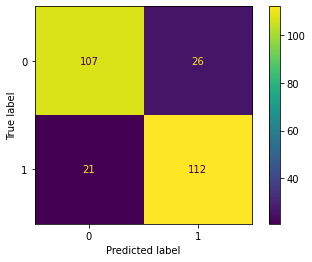

In [64]:
rf_predicted = cross_val_predict(rf_model,feat_train,targ_train,cv=10)
cm = confusion_matrix(targ_train, rf_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

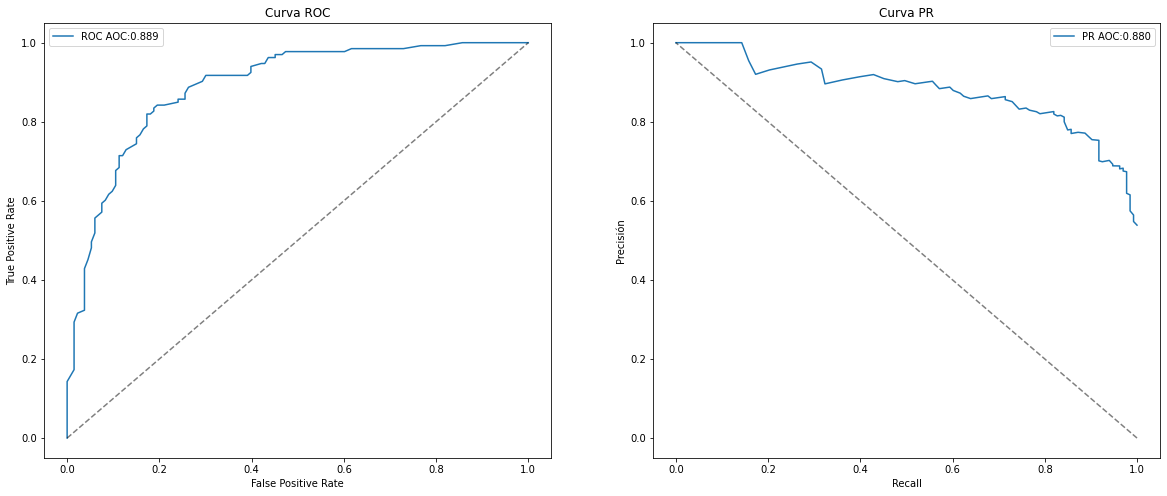

In [36]:
rf_predicted = cross_val_predict(rf_model,feat_train,targ_train,cv=10,method="predict_proba")
fpr, tpr, thresholds = roc_curve(targ_train, rf_predicted[:,1])
precisions, recalls, thresholds = precision_recall_curve(targ_train, rf_predicted[:,1])
roc_auc = auc(fpr, tpr)
pr_auc = auc(recalls, precisions)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
plt.subplot(1,2,1)
plt.plot(fpr,tpr,label = "ROC AOC:{:.3f}".format(roc_auc))
plt.plot([0,1],[0,1],'--k', alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.subplot(1,2,2)
plt.plot(recalls,precisions,label = "PR AOC:{:.3f}".format(pr_auc))
plt.plot([1,0],[0,1],'--k', alpha=0.5)
plt.ylabel('Precisión')
plt.xlabel('Recall')
plt.title('Curva PR')
plt.legend()



In [ ]:
#print(*zip(thresholds,recalls,precisions))

Test: 0.833


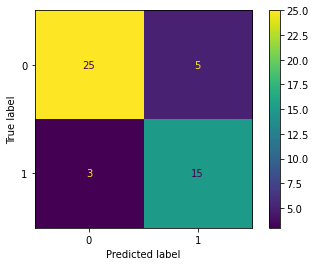

In [61]:
rf_predicted_t = (rf_model.predict_proba(scaler.transform(feat_test))>0.43)[:,1]
cm = confusion_matrix(targ_test, rf_predicted_t)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
rf_scoring_t = recall_score(targ_test,rf_predicted_t)
print("Test: {:.3f}".format(rf_scoring_t))

---
## HASTA ACA EL BASELINE RANDOMFOREST
---
